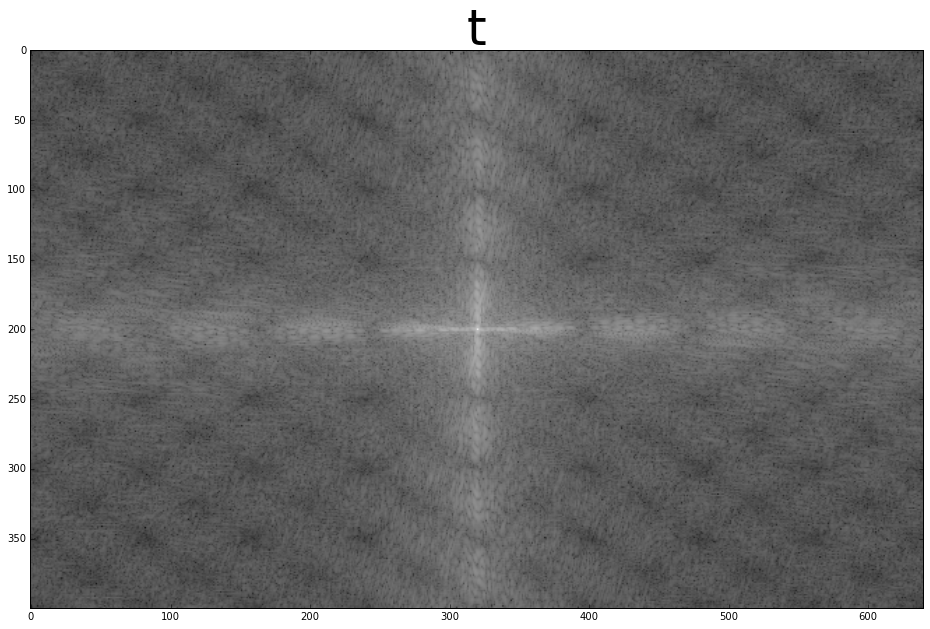

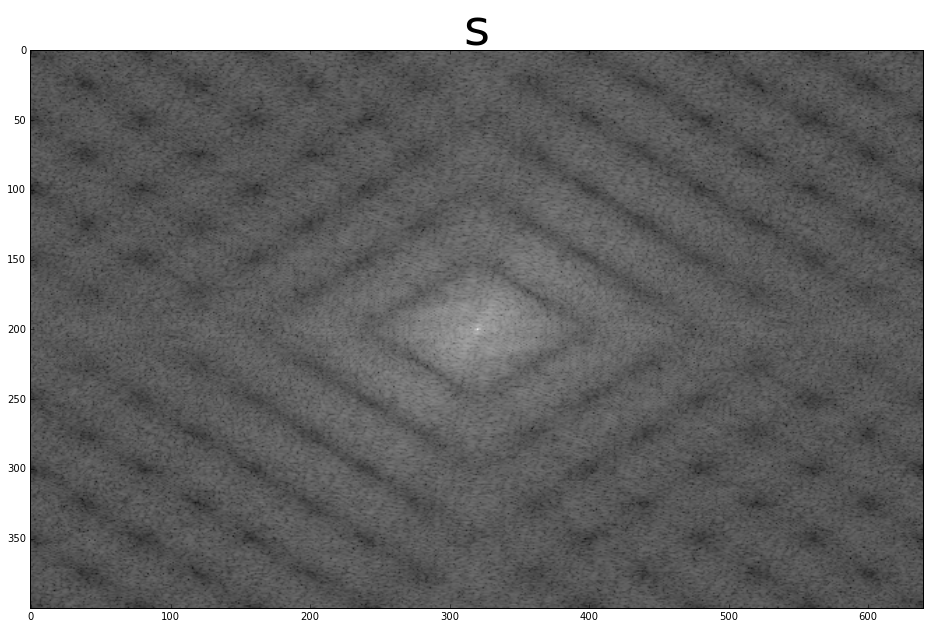

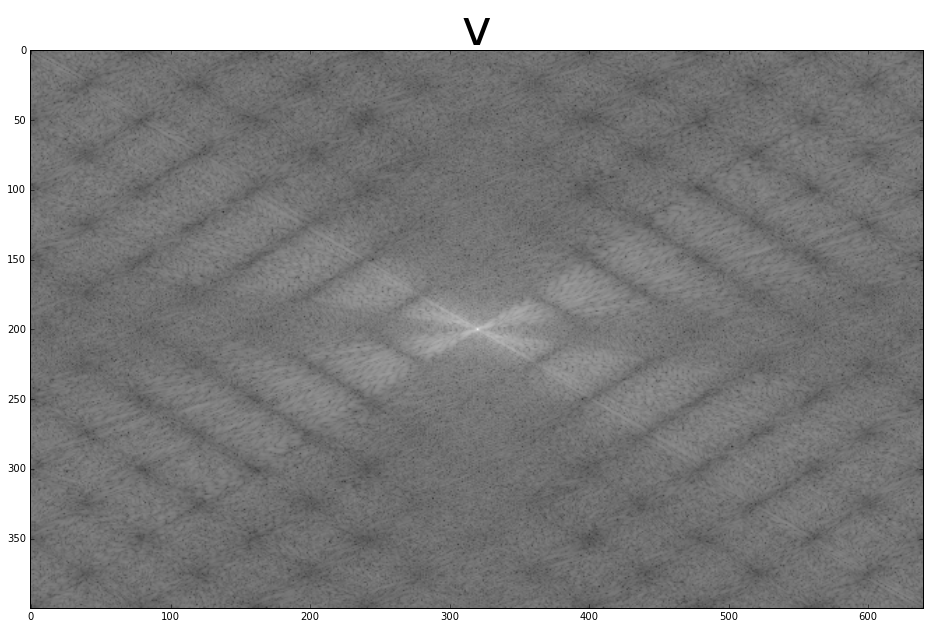

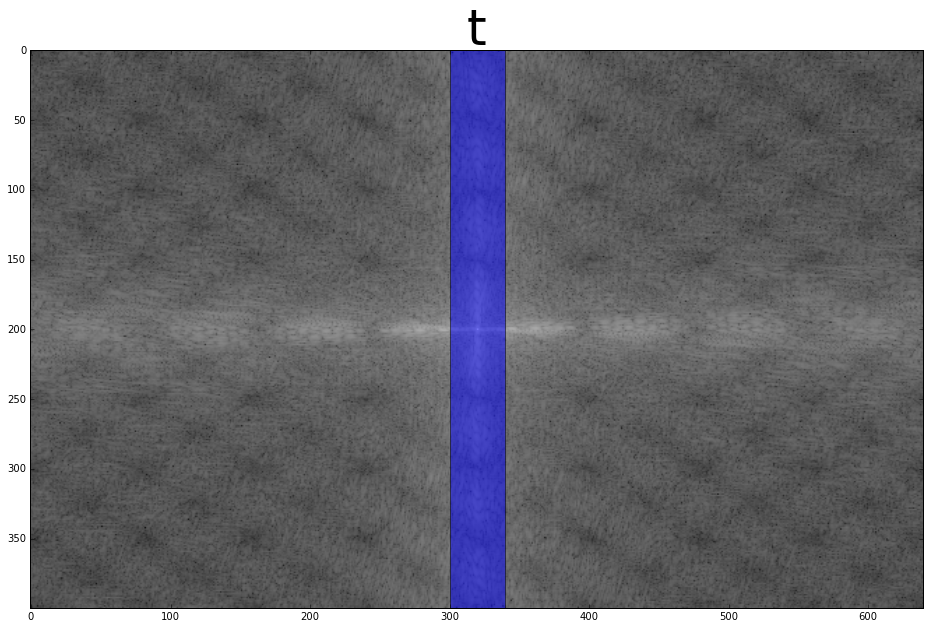

In [7]:
# for python 2 compatibility #
from __future__ import print_function
#                            #
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
import matplotlib.patches as mpatches
import matplotlib.pylab as pylab


from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

pylab.rcParams['figure.figsize'] = 16, 12  # that's default image size for this interactive session

Ts = ['./characters/T1.GIF','./characters/T2.GIF','./characters/T3.GIF',
      './characters/T4.GIF','./characters/T5.GIF','./characters/T6.GIF',
      './characters/T7.GIF','./characters/T8.GIF','./characters/T9.GIF',
      './characters/T10.GIF']
Ss = ['./characters/S1.GIF','./characters/S2.GIF','./characters/S3.GIF',
      './characters/S4.GIF','./characters/S5.GIF','./characters/S6.GIF',
      './characters/S7.GIF','./characters/S8.GIF','./characters/S9.GIF',
      './characters/S10.GIF']
Vs = ['./characters/V1.GIF','./characters/V2.GIF','./characters/V3.GIF',
      './characters/V4.GIF','./characters/V5.GIF','./characters/V6.GIF',
      './characters/V7.GIF','./characters/V8.GIF','./characters/V9.GIF',
      './characters/V10.GIF']

def plotFT(name):
    f = io.imread(name)   # read in image
    f_f = np.array(f, dtype=float)
    z = np.fft.fft2(f_f)           # do fourier transform
    q = np.fft.fftshift(z)         # puts u=0,v=0 in the centre
    Magq =  np.absolute(q)         # magnitude spectrum
    Phaseq = np.angle(q)           # phase spectrum
    ax1.imshow( np.log( np.absolute(q) + 1 ), cmap='gray' ) # io.
    plt.show()

def getFTs(images):    
    fts = []
    for image in images:
        f = io.imread(image)   # read in image
        f_f = np.array(f, dtype=float)
        z = np.fft.fft2(f_f)           # do fourier transform
        q = np.fft.fftshift(z)         # puts u=0,v=0 in the centre
        fts.append(q)
    return fts 

def getFT(image):
    f = io.imread(image)   # read in image
    f_f = np.array(f, dtype=float)
    z = np.fft.fft2(f_f)           # do fourier transform
    q = np.fft.fftshift(z)         # puts u=0,v=0 in the centre
    return q
    
# def superImposeAndPlot(fts,letter):  
#     average = np.sum(fts, axis=0)
    
#     Magq =  np.absolute(average)         # magnitude spectrum
#     Phaseq = np.angle(average)           # phase spectrum
#     fig1 = plt.figure()
#     ax1  = fig1.add_subplot( 111 )
#     ax1.axis("on")
#     ax1.set_title(letter, {'fontsize':50})
#     ax1.imshow( np.log( np.absolute(average) + 1 ), cmap='gray' ) # io.
#     plt.show()
    
def superImposeAndPlot(fts,letter):  
    average = np.sum(fts, axis=0)
    fig1 = plt.figure()
    ax1  = fig1.add_subplot( 111 )
    ax1.axis("on")
    ax1.set_title(letter, {'fontsize':50})
    ax1.imshow( np.log( np.absolute(average) + 1 ), cmap='gray' ) # io.
    plt.show()    
    
def plotMasks(fts, letter):
    average = np.sum(fts, axis=0)
    fig1 = plt.figure()
    ax1  = fig1.add_subplot( 111 )
    ax1.add_patch(mpatches.Rectangle(
    (300, 0),   # (x,y)
    40,          # width
    400,          # height
    alpha=0.5        
    )
    )
    ax1.axis("on")
    ax1.set_title(letter, {'fontsize':50})
    ax1.imshow( np.log( np.absolute(average) + 1 ), cmap='gray' ) # io.
    plt.show()
    
        
    



superImposeAndPlot(getFTs(Ts),"t")   
superImposeAndPlot(getFTs(Ss),"s")
superImposeAndPlot(getFTs(Vs),"v")
plotMasks(getFTs(Ts),"t");


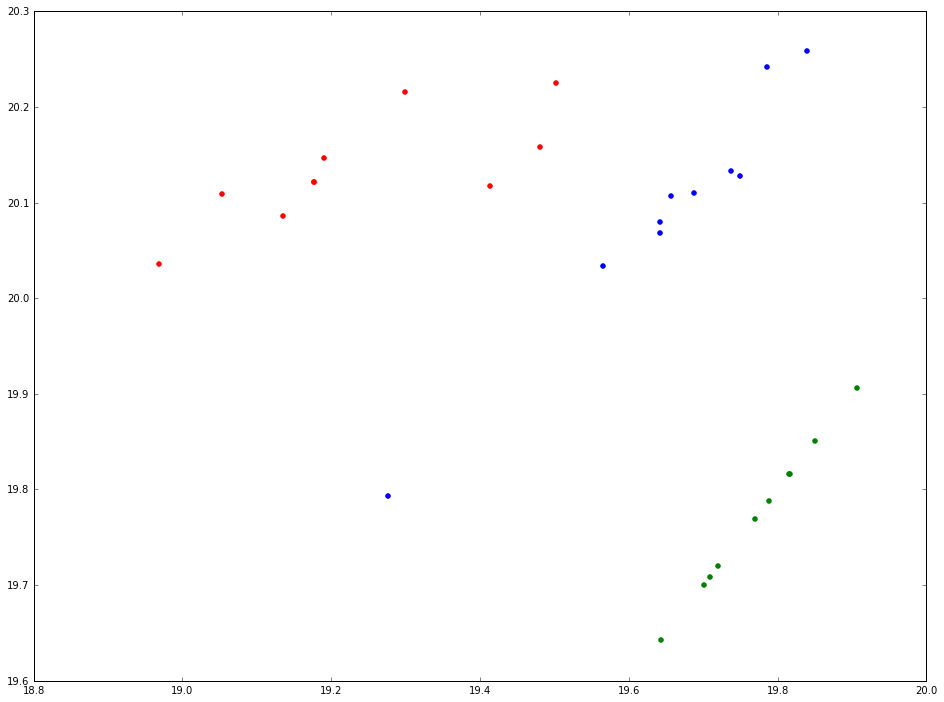

arr:  [[ 18.96809612  20.03614353]
 [ 19.50229917  20.22469165]
 [ 19.48057084  20.15774272]
 [ 19.29911099  20.21529021]
 [ 19.17700059  20.12195245]
 [ 19.1358849   20.08544454]
 [ 19.19046571  20.14643216]
 [ 19.05315527  20.10872567]
 [ 19.17700059  20.12195245]
 [ 19.41348677  20.11769699]
 [ 19.8160235   19.8160235 ]
 [ 19.76936224  19.76936224]
 [ 19.72051939  19.72051939]
 [ 19.64280278  19.64280278]
 [ 19.90627959  19.90627959]
 [ 19.70049393  19.70049393]
 [ 19.81648164  19.81648164]
 [ 19.85068281  19.85068281]
 [ 19.70880899  19.70880899]
 [ 19.78816193  19.78816193]
 [ 19.83974288  20.25881615]
 [ 19.68814068  20.10985772]
 [ 19.74993125  20.12807   ]
 [ 19.27600278  19.79328648]
 [ 19.64196257  20.07910729]
 [ 19.78620699  20.24160131]
 [ 19.64207831  20.06851016]
 [ 19.65667121  20.10678069]
 [ 19.56587032  20.03356993]
 [ 19.73773295  20.13332943]]


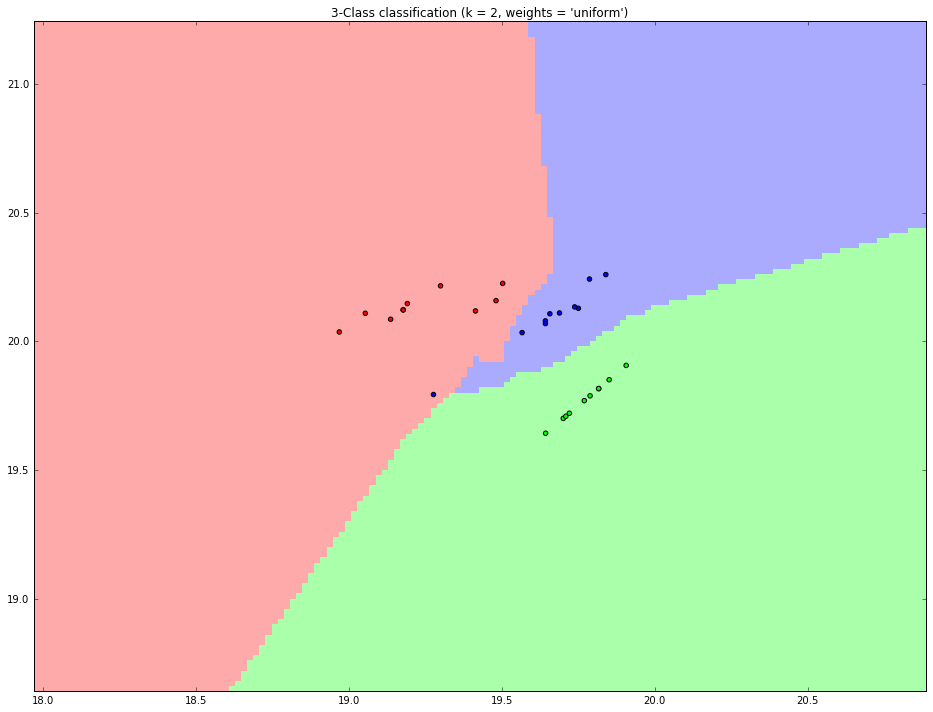

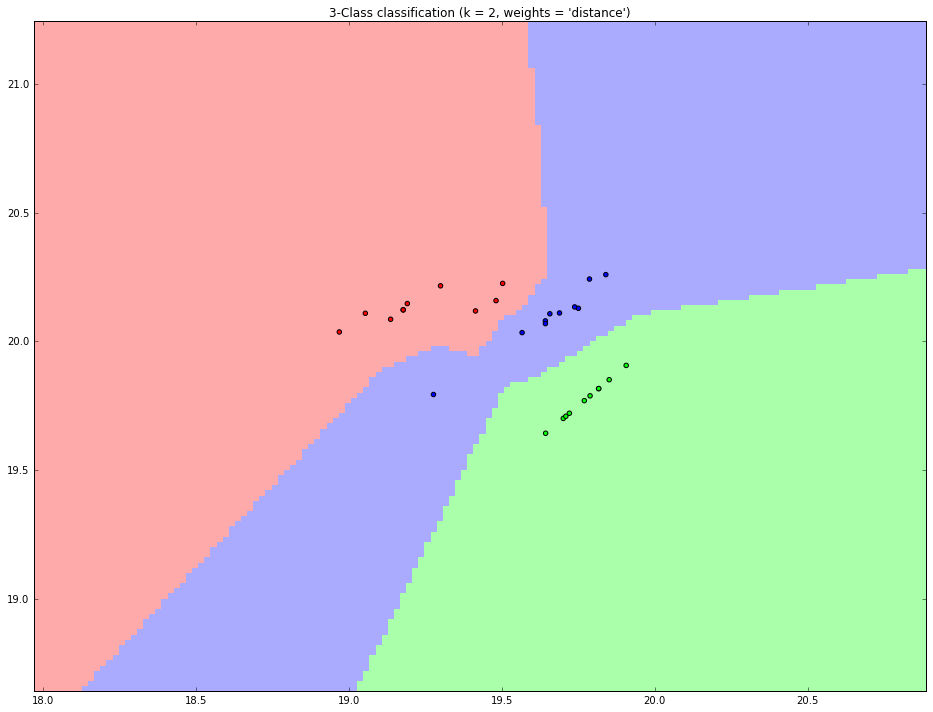

In [23]:
def ring(mag):
    inner = 120
    outer = 200
    
    w, h = len(mag[0]), len(mag)
    d = lambda x, y : ((x-w//2)**2 + (y-h//2)**2)**0.5
    inRing = lambda x, y : inner <= d(x, y) and d(x, y) <= outer
    filterVals = lambda x, y : mag[y][x] if inRing(x, y) else 0
    return sum([sum([filterVals(x, y) for x in range(w)]) for y in range(h)])

def getRingFeatureVals(fts):
    vals = []
    for ft in fts:
        vals.append(np.log(ring(np.absolute(ft))))
    return vals

def cross(mag):
    xmin = 310
    xmax = 330
    ymin = 190
    ymax = 210
    w, h = len(mag[0]), len(mag)
    inRect = lambda x, y : (xmin <= x <= xmax) or (ymin <= y <= ymax)
    filterVals = lambda x, y : mag[y][x] if inRect(x, y) else 0
    return sum([sum([filterVals(x, y) for x in range(w)]) for y in range(h)])

def getCrossFeatureVals(fts):
    vals = []
    for ft in fts:
        vals.append(np.log(cross(np.absolute(ft))))

    return vals

x1 = getRingFeatureVals(getFTs(Ts))
y1 = getCrossFeatureVals(getFTs(Ts)) 

x2 = getCrossFeatureVals(getFTs(Vs))
y2 = getCrossFeatureVals(getFTs(Vs)) 

x3 = getRingFeatureVals(getFTs(Ss))
y3 = getCrossFeatureVals(getFTs(Ss)) 

plt.scatter(x1, y1, color="r")
plt.scatter(x2, y2, color="g")
plt.scatter(x3, y3, color="b")
plt.show()


coords = []
for i in range (0, 10):
    coords.append([x1.pop(), y1.pop()])
    
for i  in range(0, 10):
    coords.append([x2.pop(), y2.pop()])
    
for i  in range(0, 10):
    coords.append([x3.pop(), y3.pop()])
    
# print("coords array",coords)    

X = np.asarray(coords)

print("arr: ", X)

y = np.array([0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2])

# print("c array", c)

n_neighbors = 2

# import some data to play with
# iris = datasets.load_iris()
# X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
# y = iris.target

# print(X)
# print(y)


h = .02  # step size in the mesh


# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()